In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import os

%matplotlib inline

In [2]:
monthly_01_20raw = pd.read_csv(r'datos_mes_01_20.csv')

monthly_01_20raw['FECHA'] = pd.to_datetime(monthly_01_20raw['FECHA'], format = '%Y-%m-%d')

monthly_01_20raw = monthly_01_20raw.set_index(['FECHA'])

In [3]:
monthly_df = monthly_01_20raw.groupby(['FECHA']).agg('mean')
monthly_df2 = monthly_df.resample('M').mean()

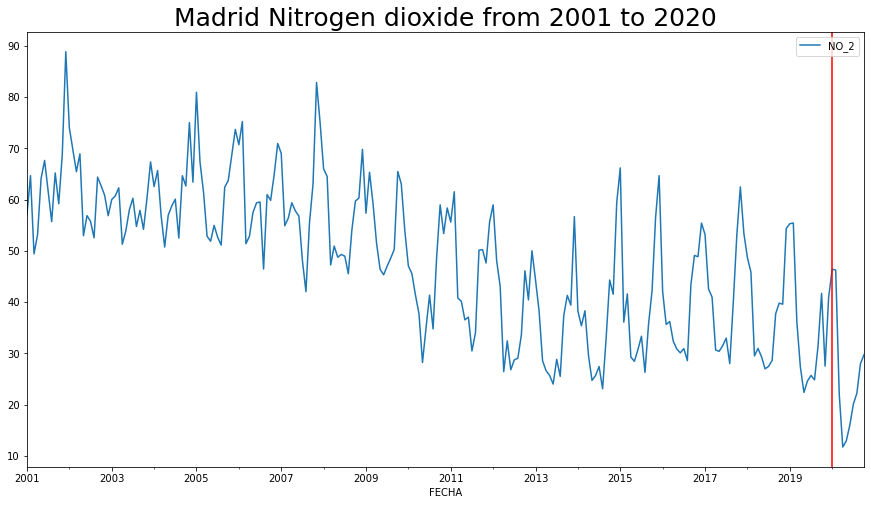

In [40]:
col_list = ['NO_2']
plt_monthly = monthly_df2[col_list]
plt_monthly.plot(figsize=(15, 8))
plt.title('Madrid Nitrogen dioxide from 2001 to 2020', fontsize=25)
plt.axvline('2020', c='red')
plt.legend(loc='upper right')
plt.savefig('nitrogen_levels_from_01_20.png')
plt.show()

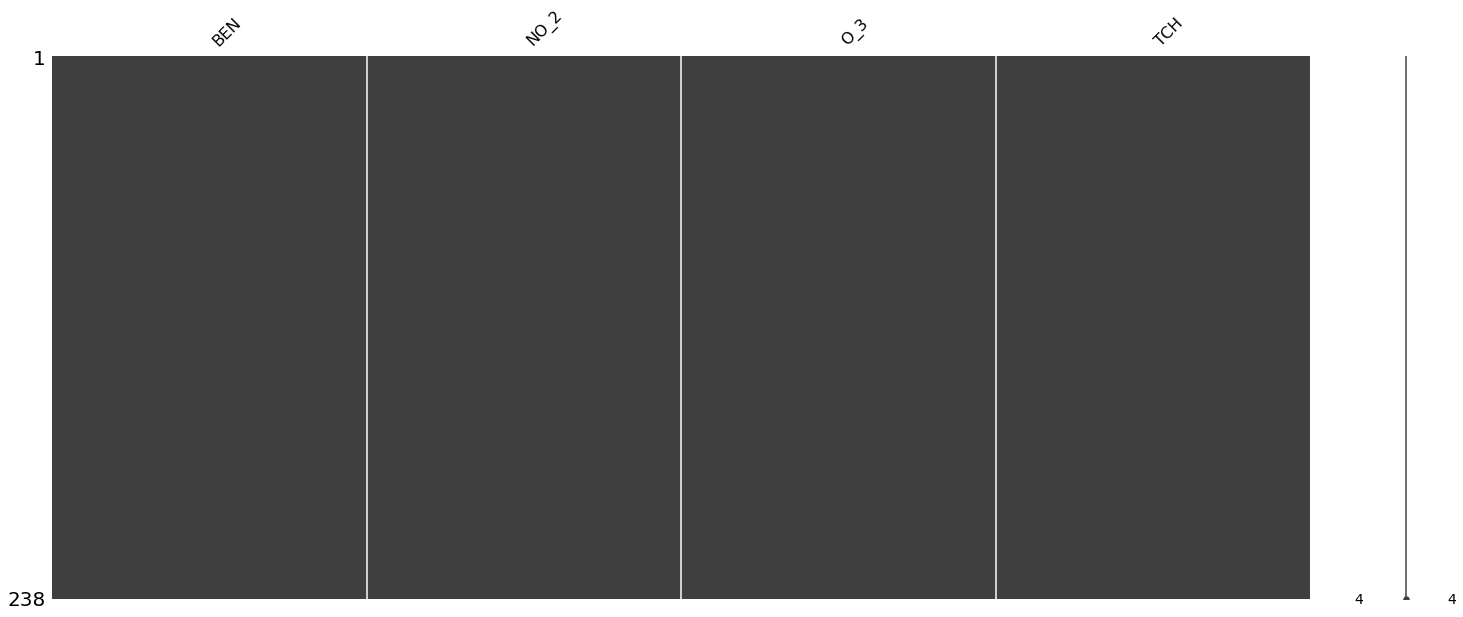

In [6]:
msno.matrix(monthly_df2);

--------Additive-------


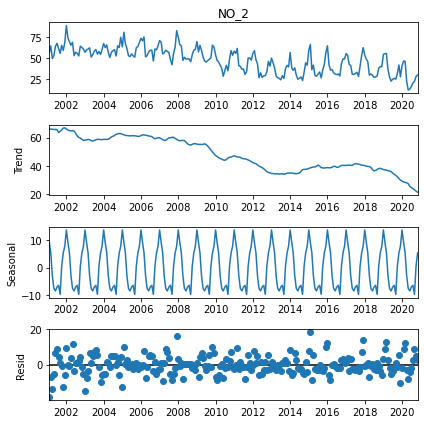

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
result_mul = seasonal_decompose(plt_monthly['NO_2'], model = 'multiplicative', extrapolate_trend = 'freq')

# Additive Decomposition

result_add = seasonal_decompose(plt_monthly['NO_2'], model = 'additive', extrapolate_trend = 'freq')

# Plot
"""plt.rcParams.update({'figure.figsize': (6,6)})
print("--------Multiplicative-------")
result_mul.plot()"""
print("--------Additive-------")
result_add.plot()
plt.savefig('nitrogen_decompose_01_20.png');
#plt.show()

In [8]:
X = plt_monthly['NO_2'].values
train = X[:228]
test = X[228:]
test

array([46.41532258, 46.25595238, 22.11693548, 11.73888889, 12.93413978,
       16.01388889, 20.09946237, 22.24596774, 27.95277778, 29.71908602])

In [9]:
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

model = auto_arima(train,
                    start_p=1,
                    start_q=1,
                    max_d=3,
                    max_p=5,
                    max_q=5,
                    m = 12,
                    trace=True,
                    stepwise=True,
                  random_state=42,
                  sesionality = True)

print(model.aic())

predictions = model.predict(10)
print("mean_squared_error:", mean_squared_error(test, predictions))
print("root_mean_squared_error:", np.sqrt(mean_squared_error(test, predictions)))

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=1496.864, Time=1.72 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1612.271, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1576.889, Time=0.34 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1594.593, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1610.287, Time=0.02 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=1.39 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=1497.952, Time=3.61 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=1498.190, Time=4.18 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1613.101, Time=0.25 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=inf, Time=3.53 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=1504.861, Time=1.97 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=1499.344, Time=5.21 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1508.177, Time=0.91 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept

In [12]:
plt_monthly['NO_2'].describe()

count    238.000000
mean      47.770956
std       14.888774
min       11.738889
25%       35.445661
50%       49.349608
75%       59.304579
max       88.833794
Name: NO_2, dtype: float64

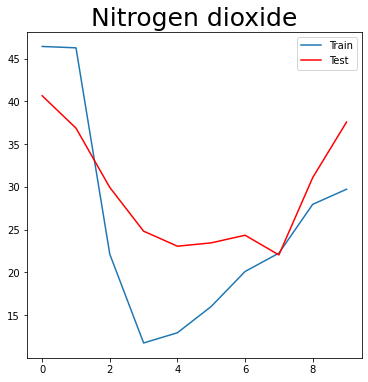

In [36]:
plt.plot(test)
plt.plot(predictions,color='red')
plt.legend(['Train', 'Test'])
plt.title('Nitrogen dioxide', fontsize=25)
plt.savefig('nitrogen_predict_01_20.png');

In [24]:
exogenous = monthly_df2[['TCH']][:228].values.reshape(-1,1)

In [28]:
model = auto_arima(train,
                    start_p=1,
                    start_q=1,
                    max_d=3,
                    max_p=5,
                    max_q=5,
                    m = 12,
                    trace=True,
                    stepwise=True,
                   random_state=42,
                   sesionality = True,
                   exogenous= exogenous)

print(model.summary())

print(model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=1454.404, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1502.996, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1484.104, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1481.785, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1501.023, Time=0.05 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1463.298, Time=0.47 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1460.454, Time=0.48 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=1.75 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=1448.667, Time=1.69 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=1449.840, Time=1.28 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=2.29 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=1461.919, Time=1.58 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=1473.216, Time=1.03 sec
 ARIMA(2,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=2.04 sec
 ARIMA(1,1,2)(1,0,2)[12] intercept

In [26]:
predictions_exo = model.predict(10,
                           exogenous= monthly_df2[['TCH']][228:].values.reshape(-1,1))
print("mean_squared_error:", mean_squared_error(test, predictions))
print("root_mean_squared_error:", np.sqrt(mean_squared_error(test, predictions)))

mean_squared_error: 60.05181784145886
root_mean_squared_error: 7.74931079783608


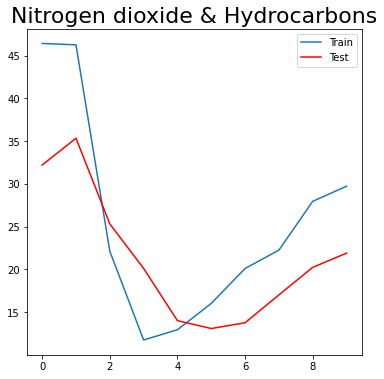

In [39]:
plt.plot(test)
plt.plot(predictions_exo,color='red')
plt.legend(['Train', 'Test'])
plt.title('Nitrogen dioxide & Hydrocarbons', fontsize=22)
plt.savefig('nitrogen_exopredict_01_20.png');